In [6]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics 
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib import pyplot
from sklearn import datasets

In [2]:
df = pd.read_csv('../DSI-CHI-1/lessons/week-07/1.3-tuning-clusters/assets/datasets/wine.csv')

In [4]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


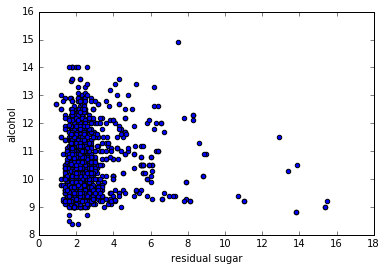

In [7]:
df.plot(kind='scatter', x='residual sugar', y='alcohol')

In [9]:
x = df[['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [10]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
# standardize first!

from sklearn.preprocessing import StandardScaler
x_stand = StandardScaler().fit_transform(x)

In [14]:
k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(x_stand)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [17]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [18]:
predictions = kmeans.predict(x_stand)

In [22]:
y.head()
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score, silhouette_score

In [23]:
pd.Series(predictions).value_counts()

6    362
1    298
3    255
5    228
0    227
7    157
2     44
4     28
dtype: int64

In [21]:
accuracy_score(y, predictions)

0.13008130081300814

In [26]:
df = df.join(pd.DataFrame(predictions, columns=['clusters8']))

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,6
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,6


In [29]:
df.groupby('clusters8')['quality'].value_counts()

clusters8  quality
0          6          110
           7           87
           5           19
           8            9
           4            2
1          5          198
           6           86
           7            9
           4            4
           3            1
2          5           26
           6           12
           7            5
           4            1
3          5          137
           6           99
           4           10
           7            9
4          5           17
           6            9
           4            1
           7            1
5          6          109
           5           64
           7           46
           8            5
           3            2
           4            2
6          5          190
           6          119
           4           28
           7           18
           3            7
7          6           94
           5           30
           7           24
           4            5
           8       

In [31]:
df.groupby('clusters8')['alcohol'].min()

clusters8
0    10.0
1     8.5
2     8.8
3     8.7
4     9.0
5     8.4
6     9.0
7    10.0
Name: alcohol, dtype: float64

In [33]:
df.groupby('clusters8')['alcohol'].max()

clusters8
0    14.0
1    11.9
2    12.3
3    11.2
4    10.5
5    14.9
6    12.2
7    14.0
Name: alcohol, dtype: float64

In [34]:
df.groupby('clusters8')['alcohol'].describe()

clusters8       
0          count    227.000000
           mean      11.625110
           std        0.724498
           min       10.000000
           25%       11.100000
           50%       11.600000
           75%       12.100000
           max       14.000000
1          count    298.000000
           mean       9.818904
           std        0.591501
           min        8.500000
           25%        9.400000
           50%        9.700000
           75%       10.100000
           max       11.900000
2          count     44.000000
           mean      10.115909
           std        1.003701
           min        8.800000
           25%        9.300000
           50%       10.000000
           75%       10.500000
           max       12.300000
3          count    255.000000
           mean       9.746863
           std        0.510355
           min        8.700000
           25%        9.400000
           50%        9.600000
                       ...    
4          std        

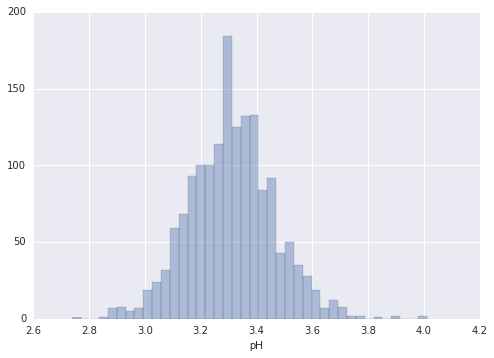

In [38]:
import seaborn as sns

sns.distplot(df['pH'], kde=False)

In [40]:
df.groupby('clusters8')['residual sugar'].mean()

clusters8
0    2.314978
1    2.430201
2    8.670455
3    2.155294
4    1.989286
5    2.799123
6    2.352901
7    2.121656
Name: residual sugar, dtype: float64

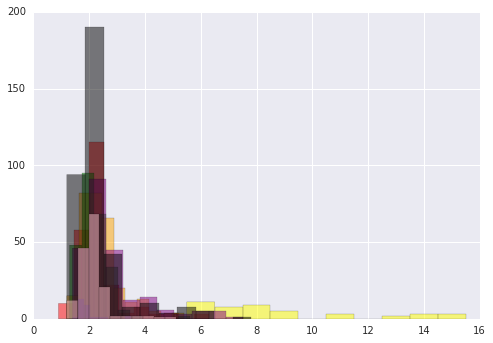

In [46]:
colors_in_graph = ['red', 'orange', 'yellow','green', 'blue', 'purple', 'black', 'pink']

for x in zip(range(0,8), colors_in_graph):
    plt.hist(df.loc[(df['clusters8'] == x[0]), 'residual sugar'], 
             color=x[1], alpha=0.5)

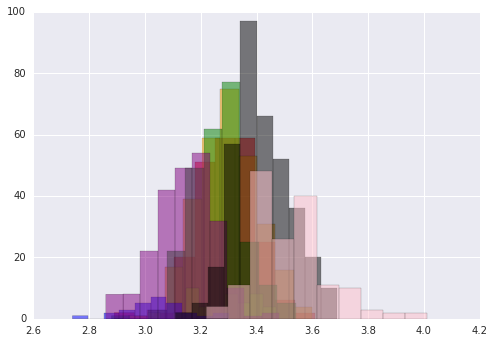

In [47]:
for x in zip(range(0,8), colors_in_graph):
    plt.hist(df.loc[(df['clusters8'] == x[0]), 'pH'], 
             color=x[1], alpha=0.5)

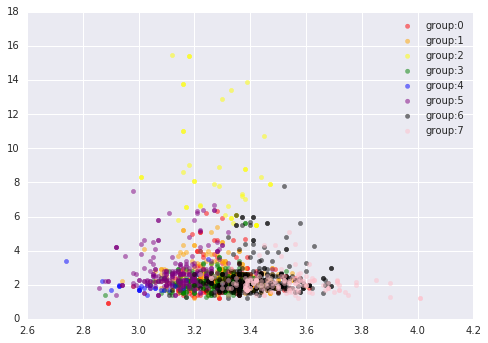

In [56]:
colors_in_graph = ['red', 'orange', 'yellow','green', 'blue', 'purple', 'black', 'pink']

for x in zip(range(0,8), colors_in_graph):
    plt.scatter(df.loc[(df['clusters8'] == x[0]), 'pH'],
                df.loc[(df['clusters8'] == x[0]), 'residual sugar'],
               color=x[1], alpha=0.5,
               label ='group:' + str(x[0]))
plt.legend()

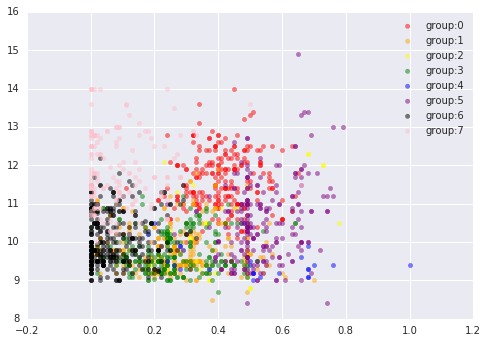

In [57]:
for x in zip(range(0,8), colors_in_graph):
    plt.scatter(df.loc[(df['clusters8'] == x[0]), 'citric acid'],
                df.loc[(df['clusters8'] == x[0]), 'alcohol'],
               color=x[1], alpha=0.5,
               label ='group:' + str(x[0]))
plt.legend()

In [59]:
df.loc[(df['clusters8'] == 6)].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0
mean,7.265470,0.688232,0.072928,2.352901,0.083751,11.954420,32.729282,0.996586,3.414779,0.591271,10.062247,5.312155,6.0
std,0.653519,0.159027,0.078149,0.926868,0.024927,5.688473,18.604610,0.001155,0.102369,0.098549,0.652706,0.765833,0.0
min,5.600000,0.370000,0.000000,1.200000,0.039000,3.000000,8.000000,0.993960,3.110000,0.330000,9.000000,3.000000,6.0
25%,6.800000,0.586250,0.010000,1.800000,0.073000,7.000000,19.000000,0.995753,3.350000,0.530000,9.500000,5.000000,6.0
50%,7.200000,0.657500,0.050000,2.100000,0.079000,12.000000,29.000000,0.996530,3.400000,0.580000,9.900000,5.000000,6.0
75%,7.700000,0.760000,0.120000,2.500000,0.088000,15.000000,39.000000,0.997230,3.480000,0.640000,10.500000,6.000000,6.0
max,10.100000,1.580000,0.420000,7.800000,0.267000,35.000000,93.000000,1.001000,3.690000,0.960000,12.200000,7.000000,6.0


In [60]:
from sklearn.metrics import silhouette_score
# score near 1.0 is good
silhouette_score(x_stand, predictions)

0.15130945086292502

In [61]:
# need to try and figure out the right amount of clusters to give a good score
from sklearn.cluster import KMeans


list_of_scores = []

for x in range(2, 25):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(x_stand)
    predictions = kmeans.predict(x_stand)
    sil = silhouette_score(x_stand, predictions)
    list_of_scores.append((x, sil))

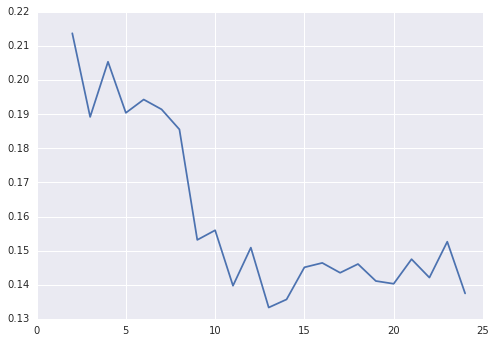

In [64]:
plt.plot([x[0] for x in list_of_scores],
        [x[1] for x in list_of_scores])

this is actually where we might start off with to decide clusters

the point right past 3-4 (could also try 6 as well) we want to look at. so it looks like 6 clusters will do. looking for point where adding another cluster will not do much for us. 

In [65]:
df.shape

(1599, 13)

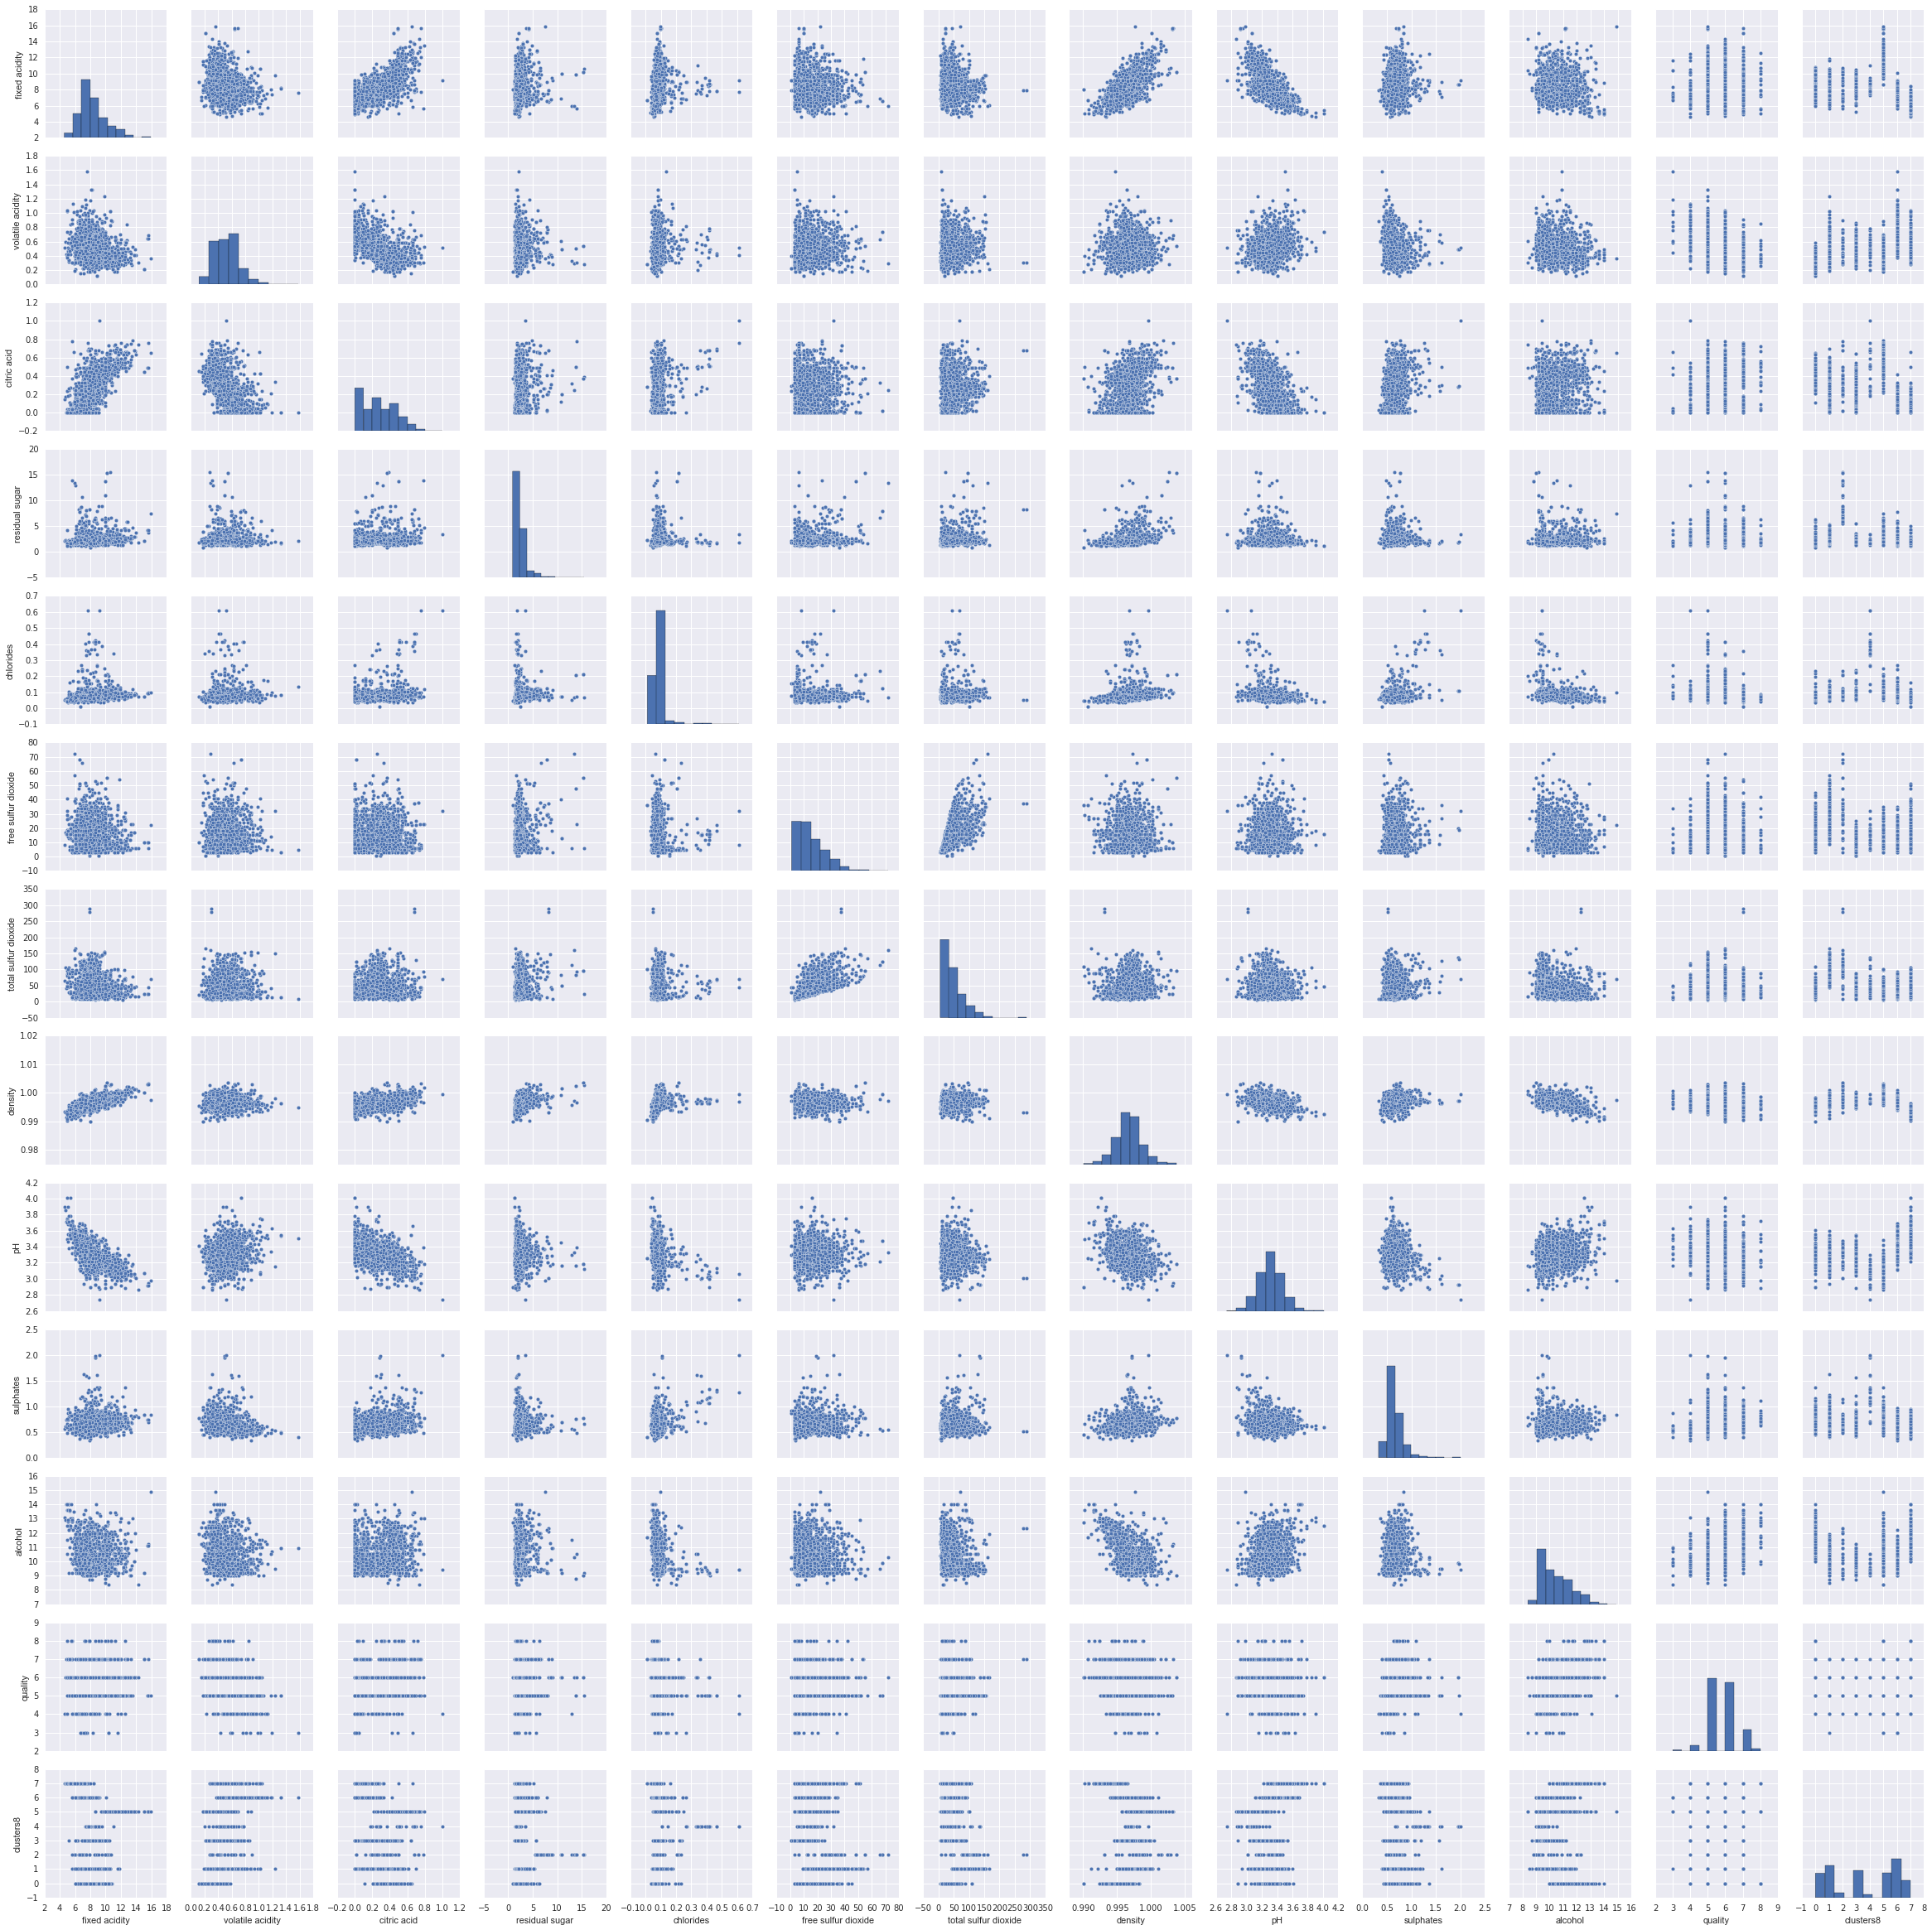

In [66]:
sns.pairplot(df)

In [68]:
final_model = KMeans(n_clusters=4)
final_model.fit(x_stand)
set(final_model.labels_)

{0, 1, 2, 3}

In [69]:
df['classes_final'] = pd.DataFrame(final_model.labels_)

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8,classes_final
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,6,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,6,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,6,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,6,3


In [72]:
df['classes_final'].value_counts()

3    722
0    471
1    378
2     28
Name: classes_final, dtype: int64

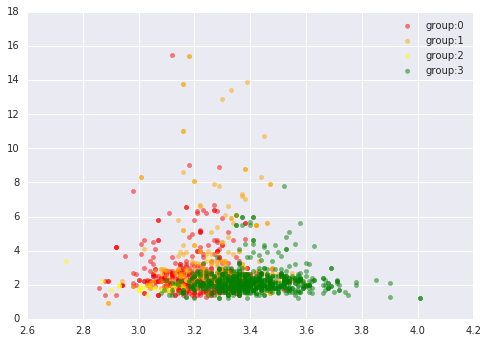

In [73]:
for x in zip(range(0,4), colors_in_graph):
    plt.scatter(df.loc[(df['classes_final'] == x[0]), 'pH'],
                df.loc[(df['classes_final'] == x[0]), 'residual sugar'],
               color=x[1], alpha=0.5,
               label ='group:' + str(x[0]))
plt.legend()

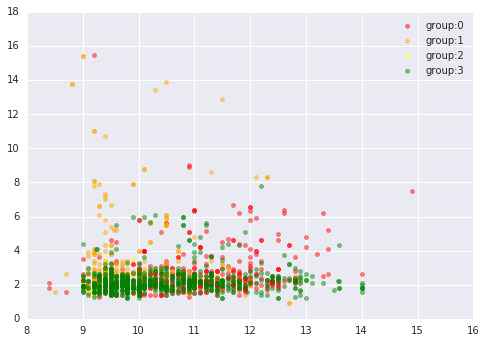

In [74]:
for x in zip(range(0,4), colors_in_graph):
    plt.scatter(df.loc[(df['classes_final'] == x[0]), 'alcohol'],
                df.loc[(df['classes_final'] == x[0]), 'residual sugar'],
               color=x[1], alpha=0.5,
               label ='group:' + str(x[0]))
plt.legend()

In [77]:
def graph_pairwise(x_col, y_col):

    for x in zip(range(0,4), colors_in_graph):
        plt.scatter(df.loc[(df['classes_final'] == x[0]), x_col],
                df.loc[(df['classes_final'] == x[0]), y_col],
               color=x[1], alpha=0.5,
               label ='group:' + str(x[0]))
plt.title('plotting %s by %s' % (x_col, y_col))
plt.legend()

NameError: name 'x_col' is not defined

get rest from codealong